# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

#### **Tecnológico de Monterrey**

#### **Prof Luis Eduardo Falcón Morales**

#### Tema de la Actividad de las Semana:

#### **Problema de asignación de créditos - South German Dataset.**


**Nombres y matrículas:**

* Luis Alfredo Ojeda Benito - A01750598
* None
* None


* Liga del dataset: https://archive.ics.uci.edu/dataset/522/south+german+credit

* Liga del artículo de la IEEE: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9239944


# **Ejercicio 1**

In [38]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

In [39]:
# Cargamos los datos:

df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [40]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:


# ************* Inlcuye aquí tu código:*****************************



new_columns = [
    'status',
    'duration',
    'credit_history',
    'purpose',
    'amount',
    'savings',
    'employment_duration',
    'installment_rate',
    'personal_status_sex',
    'other_debtors',
    'present_residence',
    'property',
    'age',
    'other_installment_plans',
    'housing',
    'number_credits',
    'job',
    'people_liable',
    'telephone',
    'foreign_worker',
    'credit_risk'
]

df.columns = new_columns





# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


# **Ejercicio 2**

In [41]:
# Transformación 0 <--> 1:

# ************* Inlcuye aquí tu código:*****************************



df['credit_risk'] = df['credit_risk'].replace({0: 1, 1: 0})



# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64



Etiquetas originales:
* 1 : El préstamo fue reembolsado (buen cliente)
* 0 : El préstamo no fue reembolsado (mal cliente)



* **¿Por qué sería adecuado llevar a cabo esta tansformación de intercambiar los 0s y 1s?**


++++++++++++++++ Inicia sección para incluir tu texto ++++++++++++++


En la analítica de riesgos y en el aprendizaje automático, se acostumbra asignar la etiqueta 1 a la clase que representa el evento que deseamos detectar o predecir. En este caso, el "mal cliente" o el impago es el riesgo que la institución financiera necesita identificar para mitigar pérdidas.


Al asignar el 1 a los "malos clientes", métricas como el Recall y la Precisión reflejarán directamente la capacidad del modelo para detectar préstamos riesgosos. Por ejemplo, un Recall alto indicará que el modelo es eficaz capturando la mayor parte de los casos de impago, lo cual es más crítico financieramente que identificar a los buenos pagadores.


++++++++++++++++ Termina sección para incluir tu texto ++++++++++++++

# **Ejercicio 3**

In [42]:
# Realiza una partición de 70-30 en entrenamiento y prueba y muestra el
# porcentaje de distribución de la variable de salida.

# Los nombres de los conjuntos train y test deberán ser como se indica
# al imprimir sus dimensiones en una celda más abajo:

# ************* Inlcuye aquí tu código:*****************************


X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size=0.70,
                                                random_state=42)

print("Distribución de clases en el conjunto de entrenamiento:")
print(ytrain.value_counts(normalize=True) * 100)




# *********** Aquí termina la sección de agregar código *************


Distribución de clases en el conjunto de entrenamiento:
credit_risk
0    70.285714
1    29.714286
Name: proportion, dtype: float64


In [43]:
# Mostremos las dimensiones de la partición generada:
print('Train X, y:',Xtrain.shape, ytrain.shape)
print('Test X, y',Xtest.shape, ytest.shape)

Train X, y: (700, 20) (700,)
Test X, y (300, 20) (300,)


# **Ejercicio 4**

In [44]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE
# define las variables correspondientes en las siguientes listas:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
list_paper_num = ['duration', 'amount', 'age']


# Variables ordinales:
list_paper_ord = ['status', 'savings', 'employment_duration', 'installment_rate',
                  'present_residence', 'number_credits', 'job']


# Variables nominales/categóricas:
list_paper_cat = ['credit_history', 'purpose', 'personal_status_sex',
                  'other_debtors', 'property', 'other_installment_plans',
                  'housing', 'telephone', 'foreign_worker']


# *********** Aquí termina la sección de agregar código *************

# **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

--- Estadísticos de Variables Numéricas ---


,duration,amount,age
count,700.000000,700.000000,700.000000
mean,21.308571,3319.404286,35.534286
std,12.139706,2830.077730,11.162871
min,4.000000,276.000000,19.000000
25%,12.000000,1346.750000,27.000000
50%,18.000000,2330.000000,33.000000
75%,24.500000,4212.750000,42.000000
max,72.000000,18424.000000,75.000000



--- Distribución de Categorías (Ejemplos clave) ---

Proporciones en 'status':
status
1    0.271429
2    0.268571
3    0.061429
4    0.398571
Name: proportion, dtype: float64

Proporciones en 'purpose':
purpose
0     0.227143
1     0.117143
2     0.162857
3     0.284286
4     0.012857
5     0.025714
6     0.045714
8     0.010000
9     0.100000
10    0.014286
Name: proportion, dtype: float64

Proporciones en 'savings':
savings
1    0.611429
2    0.104286
3    0.060000
4    0.040000
5    0.184286
Name: proportion, dtype: float64

Proporciones en 'housing':
housing
1    0.162857
2    0.721429
3    0.115714
Name: proportion, dtype: float64


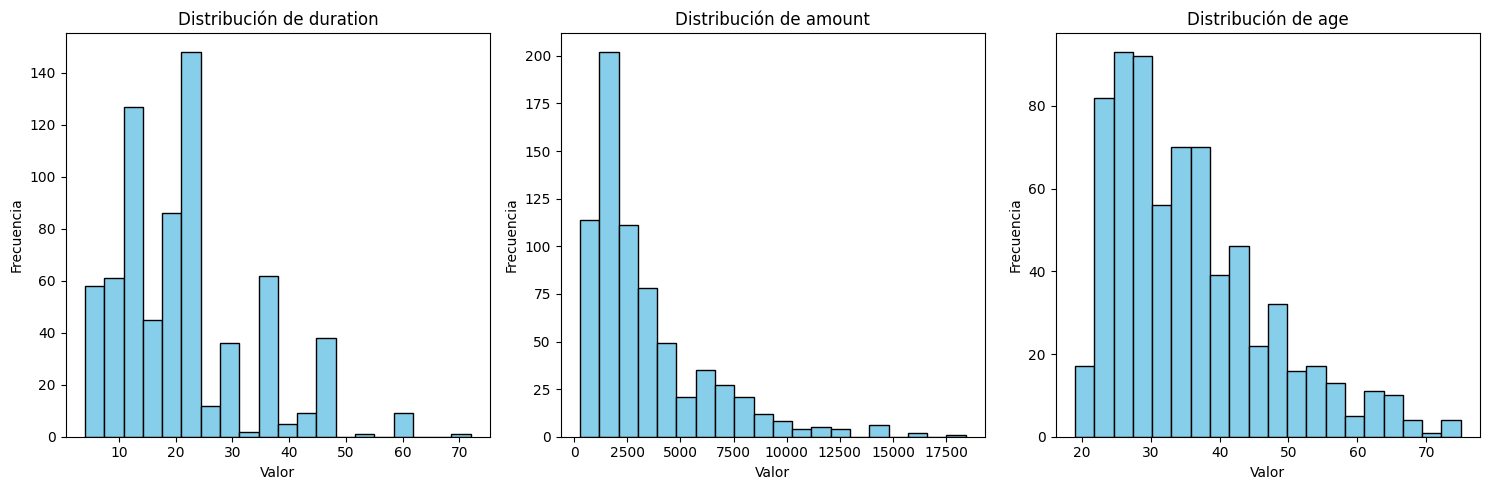


--- Correlación de Pearson con Credit Risk (Numéricas) ---
credit_risk    1.000000
duration       0.223623
amount         0.146450
age           -0.087189
Name: credit_risk, dtype: float64


In [45]:


# Puedes incluir a continuación todas las celdas de código que requieras....


print("--- Estadísticos de Variables Numéricas ---")
display(Xtrain[list_paper_num].describe())

print("\n--- Distribución de Categorías (Ejemplos clave) ---")
for col in ['status', 'purpose', 'savings', 'housing']:
    print(f"\nProporciones en '{col}':")
    print(Xtrain[col].value_counts(normalize=True).sort_index())

plt.figure(figsize=(15, 5))

for i, col in enumerate(list_paper_num, 1):
    plt.subplot(1, 3, i)
    plt.hist(Xtrain[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

train_full = pd.concat([Xtrain, ytrain], axis=1)
print("\n--- Correlación de Pearson con Credit Risk (Numéricas) ---")
print(train_full[list_paper_num + ['credit_risk']].corr()['credit_risk'].sort_values(ascending=False))



* **Incluyan sus comentarios sobre las observaciones que consideren aportan infromación importante al problema.**


++++++++++++++++ Inicia sección para incluir tu texto ++++++++++++++



**Heterogeneidad de Escalas**

Existe una disparidad notable en los rangos de las variables numéricas. Mientras que la edad se encuentra entre 19 y 75 años, el monto del crédito escala hasta los 18,424. Esta diferencia de magnitudes puede sesgar algoritmos basados en distancias (como kNN o SVM), lo que justifica la aplicación de una normalización MinMaxScaler.

**Distribución del Riesgo (Status)**

La variable status muestra que casi el 40% de los solicitantes pertenecen a la categoría 4, mientras que la categoría 3 es la menos frecuente (6%). Esta distribución es vital ya que el estado de la cuenta corriente suele ser uno de los predictores más fuertes de impago.

**Concentración en Ahorros**

Más del 61% de los clientes se encuentran en la categoría 1 de savings (ahorros bajos o nulos), lo que sugiere un perfil de cliente con mayor vulnerabilidad financiera y, por ende, un factor de riesgo crítico a evaluar.

**Propósito del Crédito**

La categoría 3 de purpose es la más predominante (28%). Al ser una variable nominal, el análisis confirma que debemos evitar el uso de etiquetas numéricas directas para no inducir un orden falso, optando por One-Hot Encoding.

**Sesgo en Montos**

El promedio de amount (3,319) es significativamente mayor a la mediana (2,330), lo que confirma un sesgo a la derecha. Esto implica que los créditos de montos muy elevados son menos frecuentes pero representan un riesgo de pérdida mayor para la institución.



++++++++++++++++ Termina sección para incluir tu texto ++++++++++++++

# **Ejercicio 6**

In [46]:
# Transformaciones que se aplicarán a las variables numéricas usando las
# clases Pipeline y ColumnTransformer de sklearn:

# ************* Inlcuye aquí tu código:*****************************


# 6a) Variables numéricas:
num_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
num_pipe_nombres = list_paper_num



# 6b) Variables categóricas/nominales:
nom_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])
nom_pipe_nombres = list_paper_cat



# 6c) Variables ordinales:
ord_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
ord_nombres = list_paper_ord



# Conjuntemos las transformaciones de todo tipo de variable y
# dejamos sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[
    ('num', num_pipe, num_pipe_nombres),
    ('cat', nom_pipe, nom_pipe_nombres),
    ('ord', ord_pipe, ord_nombres)
], remainder='passthrough')



# *********** Aquí termina la sección de agregar código *************




In [47]:
# Veamos cómo aumentó la dimensión de los datos de entrada:

Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Antes de las transformaciones:", Xtmp.shape)
print("Después de las transformaciones:", tmp.shape)

Antes de las transformaciones: (700, 20)
Después de las transformaciones: (700, 38)


# **Ejercicio 7**

In [48]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtt = Xtrain.copy()
ytt = ytrain.copy()


# *********** Aquí termina la sección de agregar código *************

print('Dimensiones de los conjuntos concatenados:')
print(Xtt.shape, ytt.shape)

Dimensiones de los conjuntos concatenados:
(700, 20) (700,)


# **Ejercicio 8**

* **8a) Justifiquen el uso de la métrica exahustividad (recall) en el contexto del problema del otorgamiento de los créditos.**


++++++++++++++++ Inicia sección para incluir tu texto ++++++++++++++



En el contexto del otorgamiento de créditos, es fundamental evaluar el costo asociado a los errores de clasificación del modelo. En este problema, la clase de interés (1) representa a los "malos clientes" (impago) y la clase (0) a los "buenos clientes".

La métrica de exhaustividad (Recall) se define como la proporción de verdaderos positivos (malos clientes correctamente identificados) sobre el total de casos que realmente son positivos. Maximizar el Recall garantiza que el modelo sea altamente sensible para detectar a los clientes de riesgo, minimizando así la cantidad de Falsos Negativos y protegiendo a la institución de pérdidas millonarias.

++++++++++++++++ Termina sección para incluir tu texto ++++++++++++++

In [49]:
# 8b) Determina el valor exacto del umbral para determinar si un modelo
#     está subentrenado y con respecto a la métrica de exhaustividad (recall).

# ++++++++++++++++ Inicia sección para incluir código ++++++++++++++


 # Puedes incluir a continuación todas las celdas de código que requieras....

# 1. Estrategia Uniforme
dummy_uniform = DummyClassifier(strategy='uniform', random_state=42)
dummy_uniform.fit(Xtt, ytt)
pred_uniform = dummy_uniform.predict(Xtt)
recall_uniform = recall_score(ytt, pred_uniform)

# 2. Estrategia Estratificada
dummy_strat = DummyClassifier(strategy='stratified', random_state=42)
dummy_strat.fit(Xtt, ytt)
pred_strat = dummy_strat.predict(Xtt)
recall_strat = recall_score(ytt, pred_strat)

print(f"Umbral de Recall (Predicción Uniforme / Azar): {recall_uniform:.4f}")
print(f"Umbral de Recall (Predicción Estratificada): {recall_strat:.4f}")



umbral_subentrenamiento_recall = 0.5



# ++++++++++++++++ Termina sección para incluir código ++++++++++++++

Umbral de Recall (Predicción Uniforme / Azar): 0.5096
Umbral de Recall (Predicción Estratificada): 0.2212


# **Ejercicio 9**

In [50]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Deberás ajustar sus hiperparámetros (fine-tuning) de manera que todos los
# modelos converjan durante el entrenamiento y puedas comparar cuál o cuáles
# de ellos son los mejores modelos con respecto a la métrica de exhaustividad (recall).
# Consulta en dado caso la documentación de cada modelo para
# la identificación de los hiperparámetros que desees ajustar.
# No modifiques el valor de las semillas, para facilitar la revisión.


# ************* Inlcuye aquí tu código:**************************
#

def mis_modelos():
  modelos, nombres = list(), list()



  # Regresión Logística:
  modelos.append(LogisticRegression( max_iter=3000 , random_state=1))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier( n_neighbors=5 ))
  nombres.append('kNN')


  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier( max_depth=5 , random_state=1))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier( n_estimators=100, max_depth=5 , random_state=1))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier( n_estimators=100, max_depth=3, learning_rate=0.1 , random_state=1))
  nombres.append('XGBoost')


  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000 , random_state=1))
  nombres.append('MLP')


  # Máquina de Vectores de Soporte:
  modelos.append(SVC( kernel='rbf', C=1.0 , random_state=1))
  nombres.append('SVM')


  return modelos, nombres




# Si se desea incluir alguna técnica de submuestreo y/o sobremuestreo:
mi_uoSampling = SMOTE(random_state=1)



# *********** Aquí termina la sección de agregar código *************


# Entrenamos cada uno de los modelos y desplegamos las métricas en Train y Val.
# NOTA: Observa que el método de Validación-Cruzada llama a sus resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y modelos evitando
  # el filtrado de información durante el entrenamiento. Observa el
  # usi de ImbPipeline en lugar de solamente Pipeline:
  pipeline = ImbPipeline(steps=[('ct',columnasTransformer),
                                ('uos',mi_uoSampling),
                                ('m',modelos[i])])

  # Aplicamos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)


  # Definimos todas las métricas que desamos recuperar. En este caso comparemos
  # con la exactitud:
  mismetricas = ['accuracy','recall']
  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtt,
                          ytt,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.716 (0.035)
	 train_accuracy 0.762 (0.012)
	 test_recall 0.668 (0.079)
	 train_recall 0.748 (0.017)
>> kNN
	 test_accuracy 0.603 (0.037)
	 train_accuracy 0.745 (0.010)
	 test_recall 0.700 (0.081)
	 train_recall 0.902 (0.014)
>> DTree
	 test_accuracy 0.650 (0.026)
	 train_accuracy 0.771 (0.017)
	 test_recall 0.610 (0.087)
	 train_recall 0.794 (0.043)
>> RF
	 test_accuracy 0.721 (0.030)
	 train_accuracy 0.838 (0.010)
	 test_recall 0.586 (0.081)
	 train_recall 0.810 (0.022)
>> XGBoost
	 test_accuracy 0.729 (0.028)
	 train_accuracy 0.888 (0.010)
	 test_recall 0.528 (0.084)
	 train_recall 0.810 (0.015)
>> MLP
	 test_accuracy 0.687 (0.052)
	 train_accuracy 0.998 (0.002)
	 test_recall 0.504 (0.098)
	 train_recall 0.998 (0.004)
>> SVM
	 test_accuracy 0.717 (0.039)
	 train_accuracy 0.829 (0.011)
	 test_recall 0.599 (0.085)
	 train_recall 0.816 (0.020)


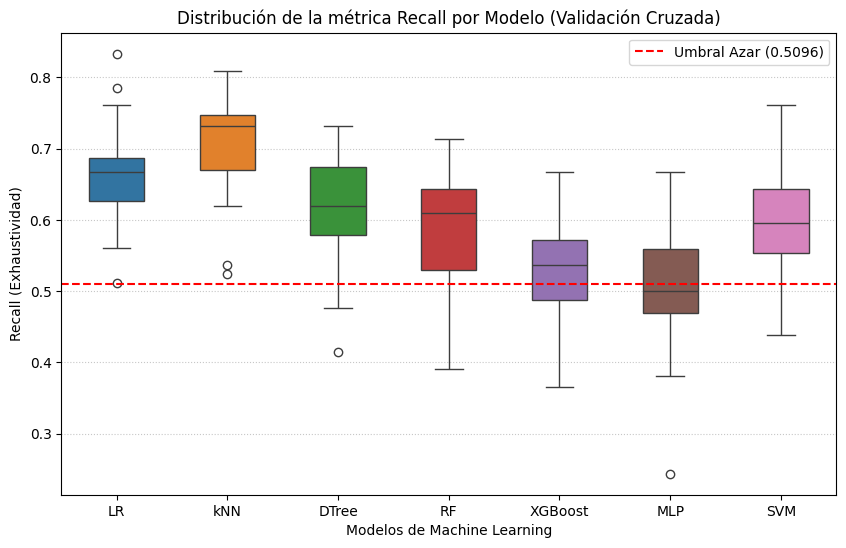

In [51]:
# Diagrama de caja del desempeño de los modelos con respecto a
# la métrica de exhaustividad (recall)

# ++++++++++++++++ Inicia sección para incluir código ++++++++++++++


 # Puedes incluir a continuación todas las celdas de código que requieras....


recall_scores = [res['test_recall'] for res in resultados]

plt.figure(figsize=(10, 6))

sns.boxplot(data=recall_scores, width=0.5)
plt.xticks(ticks=range(len(nombres)), labels=nombres)

plt.axhline(y=0.5096, color='red', linestyle='--', label='Umbral Azar (0.5096)')

plt.title('Distribución de la métrica Recall por Modelo (Validación Cruzada)')
plt.ylabel('Recall (Exhaustividad)')
plt.xlabel('Modelos de Machine Learning')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()



# ++++++++++++++++ Termina sección para incluir código ++++++++++++++

# **Ejercicio 10**

In [52]:
# 10a) Reporte de métricas

# ++++++++++++++++ Inicia sección para incluir código ++++++++++++++

# Puedes incluir a continuación todas las celdas de código que requieras....

metricas_df = pd.DataFrame({
    'Modelo': nombres,
    'Train_Accuracy': [np.mean(res['train_accuracy']) for res in resultados],
    'Test_Accuracy': [np.mean(res['test_accuracy']) for res in resultados],
    'Train_Recall': [np.mean(res['train_recall']) for res in resultados],
    'Test_Recall': [np.mean(res['test_recall']) for res in resultados]
})

metricas_df = metricas_df.sort_values(by='Test_Recall', ascending=False).reset_index(drop=True)

print("Reporte Final de Métricas (Ordenado por Test_Recall):")
display(metricas_df)



# ++++++++++++++++ Termina sección para incluir código ++++++++++++++

Reporte Final de Métricas (Ordenado por Test_Recall):


,Modelo,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,kNN,0.744881,0.603333,0.901837,0.700116
1,LR,0.762381,0.716190,0.748378,0.667712
2,DTree,0.770952,0.650476,0.793704,0.610492
3,SVM,0.828929,0.716667,0.816081,0.599071
4,RF,0.838214,0.721429,0.809691,0.585947
5,XGBoost,0.887738,0.728571,0.809689,0.528262
6,MLP,0.997738,0.686667,0.997999,0.504491


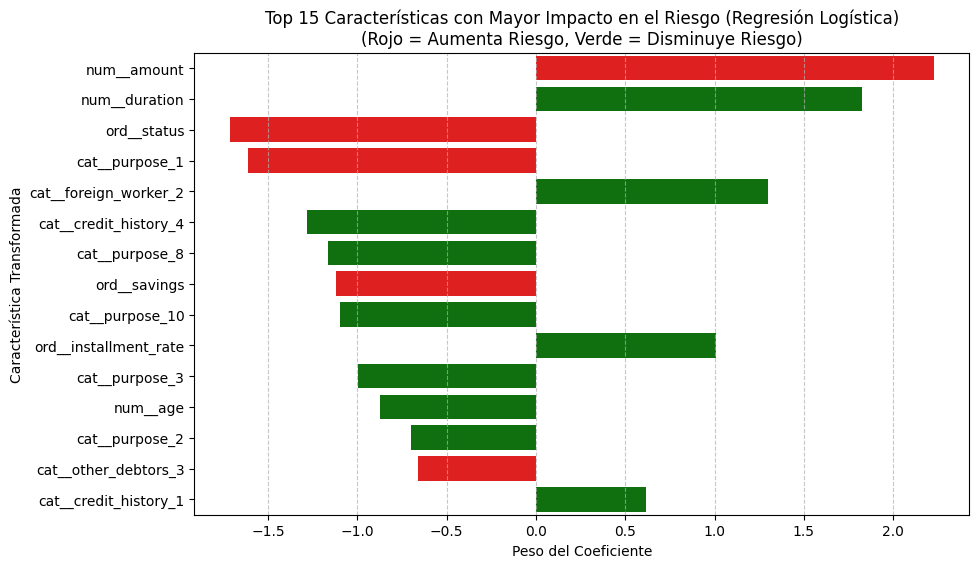

In [53]:
# 10b) Análisis de importancia de características/factores

# ++++++++++++++++ Inicia sección para incluir código ++++++++++++++


mejor_pipeline = ImbPipeline(steps=[('ct', columnasTransformer),
                                    ('uos', mi_uoSampling),
                                    ('m', LogisticRegression(max_iter=3000, random_state=1))])
mejor_pipeline.fit(Xtt, ytt)

nombres_features = mejor_pipeline.named_steps['ct'].get_feature_names_out()

coeficientes = mejor_pipeline.named_steps['m'].coef_[0]

importancia_df = pd.DataFrame({
    'Característica': nombres_features,
    'Coeficiente': coeficientes,
    'Importancia_Absoluta': np.abs(coeficientes)
}).sort_values(by='Importancia_Absoluta', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=importancia_df.head(15),
            hue='Coeficiente', palette=['red' if x > 0 else 'green' for x in importancia_df.head(15)['Coeficiente']], legend=False)
plt.title('Top 15 Características con Mayor Impacto en el Riesgo (Regresión Logística)\n(Rojo = Aumenta Riesgo, Verde = Disminuye Riesgo)')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Característica Transformada')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# ++++++++++++++++ Termina sección para incluir código ++++++++++++++

* **10c) Incluye tus comentarios de los resultados obtenidos en los inciso previos de este ejercicio.**


++++++++++++++++ Inicia sección para incluir tu texto ++++++++++++++



## **1. Análisis del Reporte de Métricas (10a):**

Al analizar la tabla, observamos que kNN obtuvo el mejor desempeño en Test_Recall (0.7001). Sin embargo, muestra claros signos de sobreentrenamiento, ya que su Train_Recall es significativamente mayor (0.9018).

El modelo más equilibrado y robusto es la Regresión Logística (LR). Se posiciona en segundo lugar con un Test_Recall muy competitivo (0.6677), pero con un Train_Recall muy cercano (0.7483). Esta estrecha diferencia demuestra que LR tiene una excelente capacidad de generalización frente a datos nuevos y no sufre de overfitting.

Los modelos más complejos fallaron considerablemente debido a un sobreentrenamiento severo. El caso más extremo es la Red Neuronal (MLP), que prácticamente memorizó los datos de entrenamiento (Train_Recall de 0.9979) pero fracasó en la validación (Test_Recall de 0.5044), rindiendo por debajo de nuestro umbral de azar (0.5096). XGBoost sufrió un destino similar.

## **2. Análisis de la Importancia de Características (10b):**

Seleccionando la Regresión Logística (por ser el modelo más estable y generalizable) para el análisis de coeficientes, logramos una alta interpretabilidad. Los coeficientes en verde (negativos) representan factores protectores, mientras que los rojos (positivos) representan variables que aumentan el riesgo de impago.

Como era de esperarse, el estatus de la cuenta (status) y el historial de pagos de créditos previos son las características más determinantes. Esta interpretabilidad confirma por qué un modelo lineal y explicativo como la Regresión Logística suele ser preferido en la industria bancaria frente a algoritmos de "caja negra", especialmente al trabajar con datasets pequeños y desbalanceados donde el riesgo de memorización es alto.

++++++++++++++++ Termina sección para incluir tu texto ++++++++++++++

# **Ejercicio 11**

### **Incluyan sus conclusiones finales de la actividad.**   

++++++++++++++++ Inicia sección para incluir tu texto ++++++++++++++



## **Conclusiones Finales de la Actividad**

**Preprocesamiento y Naturaleza de los Datos**

Confirmamos que el tratamiento adecuado de las variables es un pilar fundamental del modelado. La aplicación de MinMaxScaler para variables numéricas/ordinales y One-Hot Encoding para nominales, guiada por la literatura de la IEEE, fue clave para evitar sesgos de magnitud, especialmente en modelos basados en distancias como kNN y SVM.

**Métrica de Negocio (Recall)**

En la analítica de riesgo crediticio, el costo financiero de un Falso Negativo (otorgar crédito a un cliente que incurrirá en impago) supera con creces la pérdida de oportunidad de un Falso Positivo. Por ello, la priorización de la exhaustividad (Recall) es la decisión estratégica correcta para mitigar el riesgo de pérdida de capital.

**Complejidad vs. Generalización**

La validación cruzada evidenció el riesgo del sobreentrenamiento en datasets desbalanceados, incluso tras aplicar técnicas como SMOTE. Modelos altamente complejos, como el Perceptrón Multicapa (MLP) o XGBoost, memorizaron la clase minoritaria sintética (Train Recall cercano a 0.99) pero fallaron estrepitosamente en generalizar. En contraste, la Regresión Logística demostró ser el modelo más robusto, logrando un Test Recall competitivo (0.667) con una degradación mínima frente al entrenamiento.

**Interpretabilidad como Ventaja Competitiva**

La extracción de coeficientes de la Regresión Logística nos permitió abrir la "caja negra" e identificar que el estado actual de la cuenta (status) y el historial crediticio son los predictores más fuertes de impago. Contar con un modelo transparente no solo facilita el cumplimiento normativo bancario, sino que permite justificar cada decisión de crédito.

En conjunto, estos hallazgos reflejan el estándar de rigor analítico y toma de decisiones basadas en datos que buscamos consolidar en la Maestría en Inteligencia Artificial Aplicada, demostrando empíricamente que, en problemas de riesgo con datos desbalanceados, la estabilidad y explicabilidad de un modelo lineal frecuentemente superan la fuerza bruta de algoritmos más complejos.

++++++++++++++++ Termina sección para incluir tu texto ++++++++++++++

# **+++Fin de la Actividad con los datos de South_German_Credit+++**